In [1]:
!pip install split-folders

In [2]:
!unzip birds_.zip

Archive:  birds_.zip
   creating: birds_/barn swallow/
  inflating: birds_/barn swallow/barn swallow_pic_10.png  
  inflating: birds_/barn swallow/barn swallow_pic_107.png  
  inflating: birds_/barn swallow/barn swallow_pic_109.png  
  inflating: birds_/barn swallow/barn swallow_pic_11.png  
  inflating: birds_/barn swallow/barn swallow_pic_110.png  
  inflating: birds_/barn swallow/barn swallow_pic_111.png  
  inflating: birds_/barn swallow/barn swallow_pic_112.png  
  inflating: birds_/barn swallow/barn swallow_pic_113.png  
  inflating: birds_/barn swallow/barn swallow_pic_114.png  
  inflating: birds_/barn swallow/barn swallow_pic_115.png  
  inflating: birds_/barn swallow/barn swallow_pic_116.png  
  inflating: birds_/barn swallow/barn swallow_pic_117.png  
  inflating: birds_/barn swallow/barn swallow_pic_118.png  
  inflating: birds_/barn swallow/barn swallow_pic_119.png  
  inflating: birds_/barn swallow/barn swallow_pic_12.png  
  inflating: birds_/barn swallow/barn swallow_pi

In [3]:
import splitfolders
splitfolders.ratio('birds_', output='birds_splited', ratio=(.8, .1, .1))

Copying files: 1924 files [00:01, 1607.51 files/s]


In [ ]:
%ls

birds_/  birds_splited/  birds_.zip  sample_data/


In [4]:
base_directory = "/content/birds_splited"

In [5]:
import os
train_dir = os.path.join(base_directory, 'train')
val_dir = os.path.join(base_directory, 'val')

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=10,

        class_mode='categorical')


validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical')

Found 1534 images belonging to 13 classes.
Found 182 images belonging to 13 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

img_input = layers.Input(shape=(150, 150, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
output = layers.Dense(13, activation='softmax')(x)

model = Model(img_input, output)
model.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_46 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 74, 74, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_47 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 36, 36, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_48 (Conv2D)          (None, 34, 34, 64)        184

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.95
)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=learning_rate_schedule),
              metrics=['acc'])

In [ ]:
train_model = model.fit(
      train_generator,
      steps_per_epoch=150,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=18,
      verbose=2)

Epoch 1/30
150/150 - 90s - loss: 2.4522 - acc: 0.1406 - val_loss: 2.2268 - val_acc: 0.2167 - 90s/epoch - 603ms/step
Epoch 2/30
150/150 - 91s - loss: 2.1259 - acc: 0.2918 - val_loss: 1.8767 - val_acc: 0.3556 - 91s/epoch - 606ms/step
Epoch 3/30
150/150 - 88s - loss: 1.9111 - acc: 0.3648 - val_loss: 2.0266 - val_acc: 0.3444 - 88s/epoch - 585ms/step
Epoch 4/30
150/150 - 88s - loss: 1.7058 - acc: 0.4337 - val_loss: 1.7829 - val_acc: 0.4611 - 88s/epoch - 586ms/step
Epoch 5/30
150/150 - 88s - loss: 1.5736 - acc: 0.4772 - val_loss: 1.9248 - val_acc: 0.4944 - 88s/epoch - 589ms/step
Epoch 6/30
150/150 - 88s - loss: 1.5176 - acc: 0.4940 - val_loss: 1.3497 - val_acc: 0.5722 - 88s/epoch - 590ms/step
Epoch 7/30
150/150 - 87s - loss: 1.4206 - acc: 0.5281 - val_loss: 1.1692 - val_acc: 0.6500 - 87s/epoch - 582ms/step
Epoch 8/30
150/150 - 88s - loss: 1.2998 - acc: 0.5783 - val_loss: 2.0477 - val_acc: 0.5278 - 88s/epoch - 584ms/step
Epoch 9/30
150/150 - 88s - loss: 1.2171 - acc: 0.6024 - val_loss: 1.5768

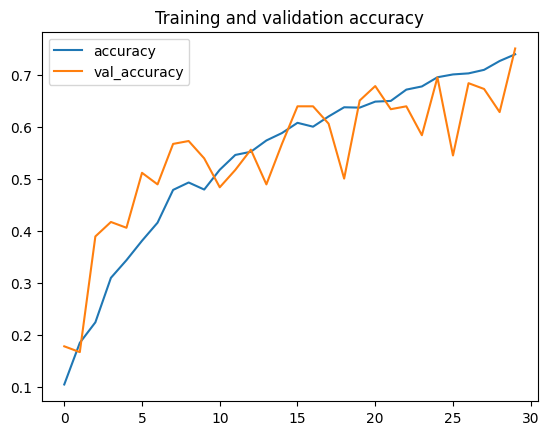

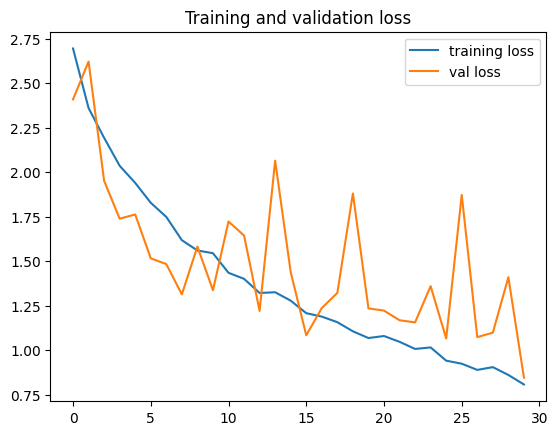

In [ ]:
import matplotlib.pyplot as plt
acc = train_model.history['acc']
val_acc = train_model.history['val_acc']


loss = train_model.history['loss']
val_loss = train_model.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='val loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
model.save('custom_model.keras')

In [23]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-12-13 09:31:55--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.207, 172.217.204.207, 172.217.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   190MB/s    in 0.4s    

2023-12-13 09:31:55 (190 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [24]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

model_weights = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
model_inception = InceptionV3(
    input_shape=(150, 150, 3), include_top=False, weights=None)
model_inception.load_weights(model_weights)

In [25]:
for layer in model_inception.layers:
  layer.trainable = False

In [27]:
last_layer = model_inception.get_layer('mixed7')
output = last_layer.output

In [31]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(13, activation='sigmoid')(x)

model = Model(model_inception.input, x)
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.0001),
              metrics=['acc'])


In [32]:
training = model.fit(
      train_generator,
      steps_per_epoch=150,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=18,
      verbose=2)

Epoch 1/10
150/150 - 184s - loss: 1.5790 - acc: 0.4960 - val_loss: 0.5918 - val_acc: 0.8056 - 184s/epoch - 1s/step
Epoch 2/10
150/150 - 169s - loss: 0.8569 - acc: 0.7115 - val_loss: 0.3775 - val_acc: 0.8611 - 169s/epoch - 1s/step
Epoch 3/10
150/150 - 168s - loss: 0.6048 - acc: 0.8072 - val_loss: 0.3095 - val_acc: 0.9167 - 168s/epoch - 1s/step
Epoch 4/10
150/150 - 177s - loss: 0.5473 - acc: 0.8286 - val_loss: 0.2579 - val_acc: 0.9111 - 177s/epoch - 1s/step
Epoch 5/10
150/150 - 167s - loss: 0.4964 - acc: 0.8461 - val_loss: 0.2201 - val_acc: 0.9278 - 167s/epoch - 1s/step
Epoch 6/10
150/150 - 169s - loss: 0.4474 - acc: 0.8601 - val_loss: 0.2513 - val_acc: 0.9111 - 169s/epoch - 1s/step
Epoch 7/10
150/150 - 163s - loss: 0.4188 - acc: 0.8742 - val_loss: 0.3095 - val_acc: 0.9111 - 163s/epoch - 1s/step
Epoch 8/10
150/150 - 164s - loss: 0.4241 - acc: 0.8842 - val_loss: 0.2206 - val_acc: 0.9444 - 164s/epoch - 1s/step
Epoch 9/10
150/150 - 164s - loss: 0.3983 - acc: 0.8876 - val_loss: 0.2082 - val_

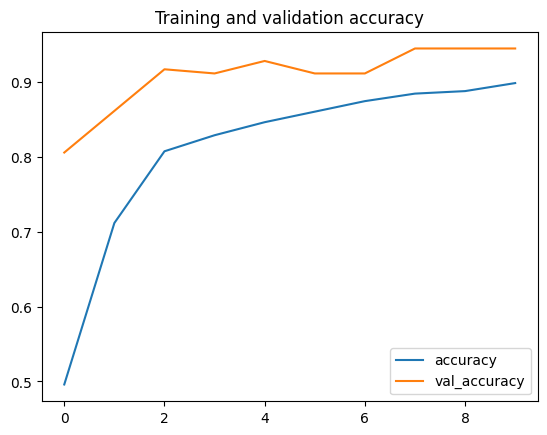

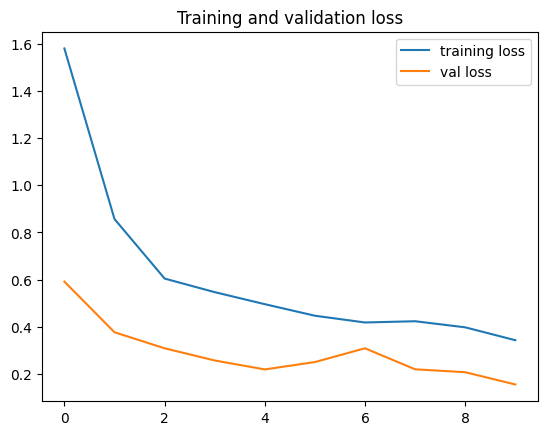

In [33]:
import matplotlib.pyplot as plt
acc = training.history['acc']
val_acc = training.history['val_acc']


loss = training.history['loss']
val_loss = training.history['val_loss']

epochs = range(len(acc))


plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='val loss')
plt.title('Training and validation loss')
plt.legend()

In [34]:
model.save('pretrained_model.keras')